# *Python Project*

## ABC Company Data Analysis

In [1]:
import pandas as pd

In [2]:
import numpy as np

In [9]:
df = pd.read_excel(r'C:\Users\BlumetraAdmin\Downloads\myexcel.xlsx', engine='openpyxl')
print(df)

              Name            Team  Number Position  Age               Height  \
0    Avery Bradley  Boston Celtics       0       PG   25  2023-02-06 00:00:00   
1      Jae Crowder  Boston Celtics      99       SF   25  2023-06-06 00:00:00   
2     John Holland  Boston Celtics      30       SG   27  2023-05-06 00:00:00   
3      R.J. Hunter  Boston Celtics      28       SG   22  2023-05-06 00:00:00   
4    Jonas Jerebko  Boston Celtics       8       PF   29  2023-10-06 00:00:00   
..             ...             ...     ...      ...  ...                  ...   
453   Shelvin Mack       Utah Jazz       8       PG   26  2023-03-06 00:00:00   
454      Raul Neto       Utah Jazz      25       PG   24  2023-01-06 00:00:00   
455   Tibor Pleiss       Utah Jazz      21        C   26  2023-03-07 00:00:00   
456    Jeff Withey       Utah Jazz      24        C   26                  7-0   
457       Priyanka       Utah Jazz      34        C   25  2023-03-07 00:00:00   

     Weight            Coll

## Preprocessing:

In [19]:
df['Height'] = np.random.randint(150, 181, size=len(df))
print(df['Height'])

0      161
1      160
3      151
6      155
7      160
      ... 
451    156
452    171
453    152
456    151
457    159
Name: Height, Length: 365, dtype: int32


In [20]:
df.dropna(inplace=True)

## Analysis Tasks:

### 1. Determine the distribution of employees across each team and calculate the percentage split relative to the total number of employees

In [21]:
team_distribution = df['Team'].value_counts()
print(team_distribution)

Team
New Orleans Pelicans      16
Portland Trail Blazers    15
Detroit Pistons           15
Milwaukee Bucks           14
Philadelphia 76ers        14
Oklahoma City Thunder     14
Los Angeles Clippers      14
Washington Wizards        13
Charlotte Hornets         13
Phoenix Suns              13
Sacramento Kings          13
Memphis Grizzlies         13
Brooklyn Nets             13
Boston Celtics            12
Dallas Mavericks          12
Indiana Pacers            12
Chicago Bulls             12
Los Angeles Lakers        12
Golden State Warriors     12
Houston Rockets           11
Cleveland Cavaliers       11
San Antonio Spurs         11
Atlanta Hawks             11
New York Knicks           11
Utah Jazz                 11
Miami Heat                10
Orlando Magic             10
Toronto Raptors           10
Denver Nuggets             9
Minnesota Timberwolves     8
Name: count, dtype: int64


In [22]:
total_employees = len(df)
team_percentage_split = (team_distribution / total_employees) * 100

In [24]:
print(team_percentage_split)

Team
New Orleans Pelicans      4.383562
Portland Trail Blazers    4.109589
Detroit Pistons           4.109589
Milwaukee Bucks           3.835616
Philadelphia 76ers        3.835616
Oklahoma City Thunder     3.835616
Los Angeles Clippers      3.835616
Washington Wizards        3.561644
Charlotte Hornets         3.561644
Phoenix Suns              3.561644
Sacramento Kings          3.561644
Memphis Grizzlies         3.561644
Brooklyn Nets             3.561644
Boston Celtics            3.287671
Dallas Mavericks          3.287671
Indiana Pacers            3.287671
Chicago Bulls             3.287671
Los Angeles Lakers        3.287671
Golden State Warriors     3.287671
Houston Rockets           3.013699
Cleveland Cavaliers       3.013699
San Antonio Spurs         3.013699
Atlanta Hawks             3.013699
New York Knicks           3.013699
Utah Jazz                 3.013699
Miami Heat                2.739726
Orlando Magic             2.739726
Toronto Raptors           2.739726
Denver Nuggets 

In [32]:
import matplotlib.pyplot as plt

In [33]:
import seaborn as sns

### 2. Segregate employees based on their positions within the company

In [36]:
positions_distribution = df['Position'].value_counts()
print(positions_distribution)

Position
SG    87
PF    81
PG    76
SF    71
C     50
Name: count, dtype: int64


### 3. Identify the predominant age group among employees

In [28]:
age_groups = pd.cut(df['Age'], bins=[20, 25, 30, 35, 40], labels=['20-25', '25-30', '30-35', '35-40'])
print(age_groups)

0      20-25
1      20-25
3      20-25
6      20-25
7      20-25
       ...  
451    25-30
452      NaN
453    25-30
456    25-30
457    20-25
Name: Age, Length: 365, dtype: category
Categories (4, object): ['20-25' < '25-30' < '30-35' < '35-40']


In [30]:
predominant_age_group = age_groups.value_counts().idxmax()
print(predominant_age_group)

20-25


### 4. Discover which team and position have the highest salary expenditure

In [39]:
team_salary_expenditure = df.groupby('Team')['Salary'].sum().idxmax()
position_salary_expenditure = df.groupby('Position')['Salary'].sum().idxmax()
print(team_salary_expenditure)

Los Angeles Clippers


In [40]:
print(position_salary_expenditure)

PG


### 5. Investigate if there's any correlation between age and salary, and represent it visually

In [41]:
correlation_age_salary = df[['Age', 'Salary']].corr().iloc[0, 1]
print(correlation_age_salary)

0.15999189342806175


## Graphical Representation:

In [ ]:
# Plotting the correlation between age and salary

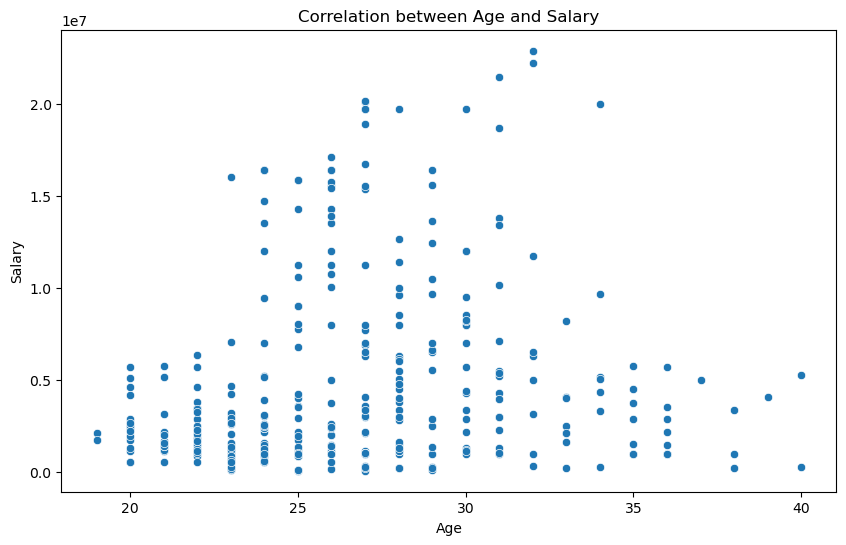

In [45]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Age', y='Salary', data=df)
plt.title('Correlation between Age and Salary')
plt.xlabel('Age')
plt.ylabel('Salary')
plt.savefig('correlation_age_salary.png')

In [ ]:
# Plotting positions distribution

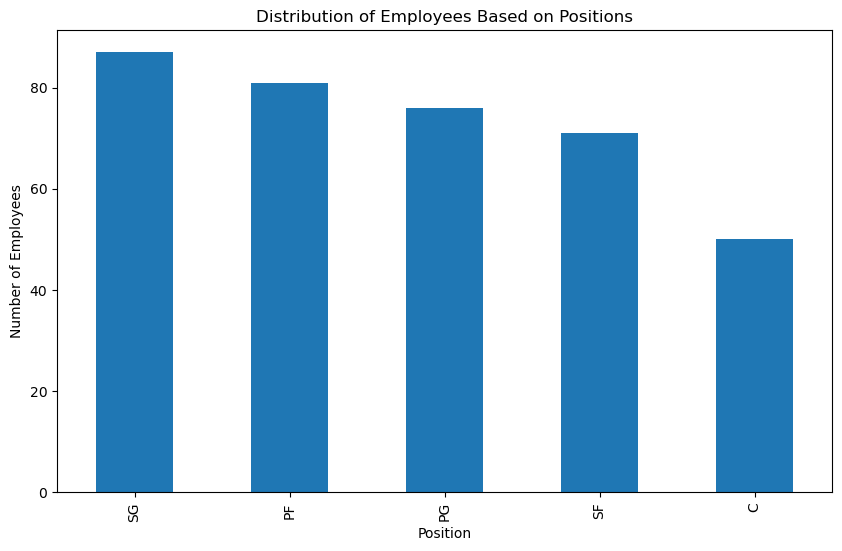

In [46]:
plt.figure(figsize=(10, 6))
positions_distribution.plot(kind='bar')
plt.title('Distribution of Employees Based on Positions')
plt.xlabel('Position')
plt.ylabel('Number of Employees')
plt.savefig('positions_distribution.png')

In [ ]:
# Plotting age group distribution

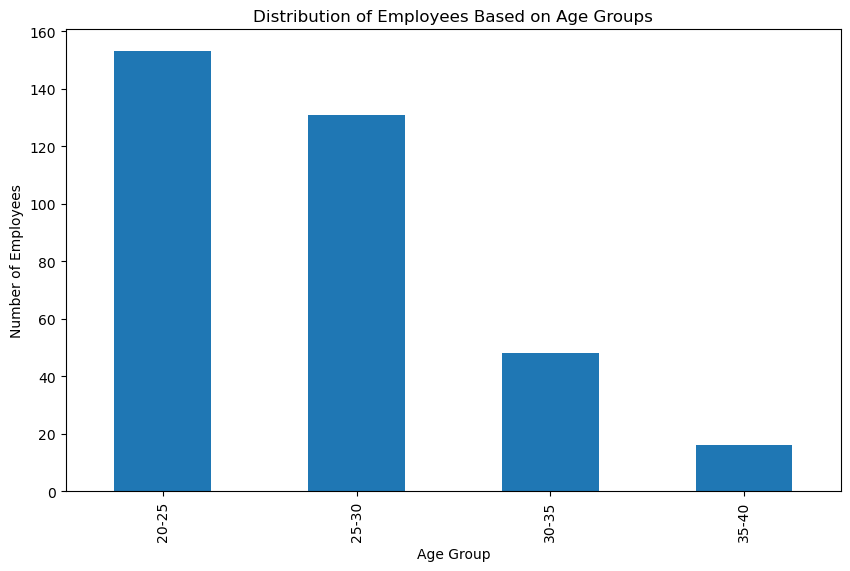

In [47]:
plt.figure(figsize=(10, 6))
age_groups.value_counts().plot(kind='bar')
plt.title('Distribution of Employees Based on Age Groups')
plt.xlabel('Age Group')
plt.ylabel('Number of Employees')
plt.savefig('age_groups_distribution.png')

In [50]:
# Plotting team salary expenditure

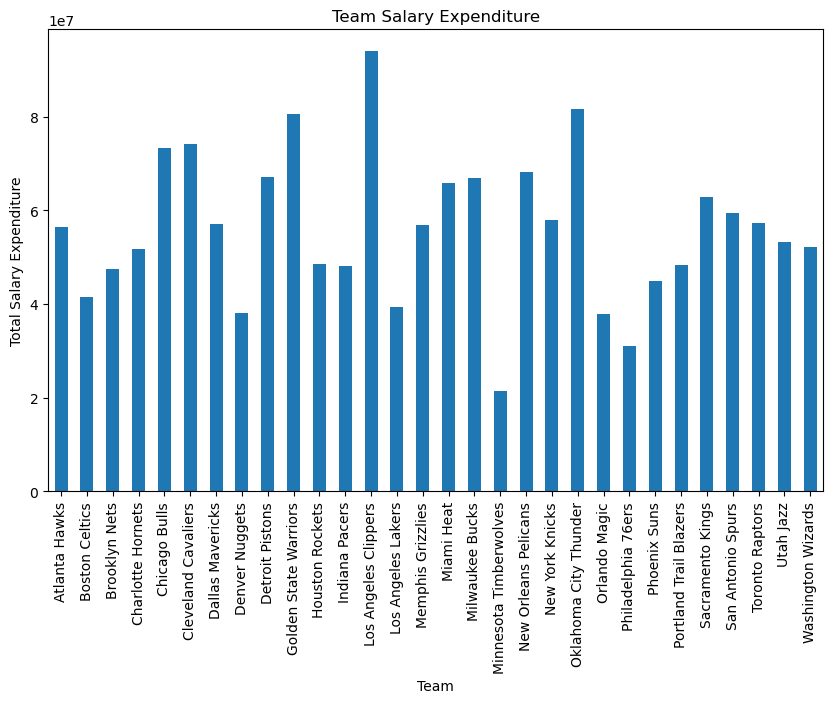

In [48]:
plt.figure(figsize=(10, 6))
df.groupby('Team')['Salary'].sum().plot(kind='bar')
plt.title('Team Salary Expenditure')
plt.xlabel('Team')
plt.ylabel('Total Salary Expenditure')
plt.savefig('team_salary_expenditure.png')

In [49]:
# Plotting position salary expenditure

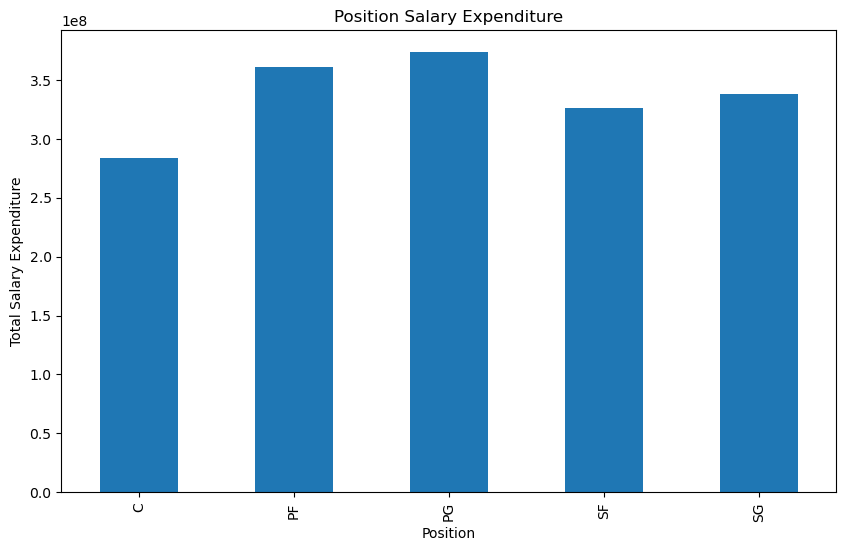

In [51]:
plt.figure(figsize=(10, 6))
df.groupby('Position')['Salary'].sum().plot(kind='bar')
plt.title('Position Salary Expenditure')
plt.xlabel('Position')
plt.ylabel('Total Salary Expenditure')
plt.savefig('position_salary_expenditure.png')

## Data Story:

In [55]:
data_story = f"""
Insights Gained from the Analysis:

1. Segregation of Employees Based on Positions :
   - The distribution of employees across different positions has been determined.
   - The most common position is {positions_distribution.idxmax()} with {positions_distribution.max()} employees.

2. Predominant Age Group :
   - The predominant age group among employees is {predominant_age_group}.

3. Highest Salary Expenditure :
   - The team with the highest salary expenditure is {team_salary_expenditure}.
   - The position with the highest salary expenditure is {position_salary_expenditure}.

4. Correlation Between Age and Salary :
   - The correlation coefficient between age and salary is {correlation_age_salary:.2f}.
   - A scatter plot has been created to visually represent this correlation.

5. Graphical Representations :
   - Bar charts have been created to visualize the distribution of employees based on positions and age groups.
   - Bar charts have been created to visualize the total salary expenditure by team and by position.
"""

print(data_story)


Insights Gained from the Analysis:

1. Segregation of Employees Based on Positions :
   - The distribution of employees across different positions has been determined.
   - The most common position is SG with 87 employees.

2. Predominant Age Group :
   - The predominant age group among employees is 20-25.

3. Highest Salary Expenditure :
   - The team with the highest salary expenditure is Los Angeles Clippers.
   - The position with the highest salary expenditure is PG.

4. Correlation Between Age and Salary :
   - The correlation coefficient between age and salary is 0.16.
   - A scatter plot has been created to visually represent this correlation.

5. Graphical Representations :
   - Bar charts have been created to visualize the distribution of employees based on positions and age groups.
   - Bar charts have been created to visualize the total salary expenditure by team and by position.

